# Homework 1 - Basic practice in Jupyter and GitHub.

Programming can only be learned by doing. The following exercises blend coding math and text to create clearly defined results. For example, instead of calculating a simple number, you must print the number plus the units (e.g. 24 mg/L). 

***
### Academic honesty statement

**SANTIAGO ORTIZ LAVERDE**

- I state that I worked alone on this assignment. Therefore, I take full responsibility for the academic integrity of the work presented below.
***

# Problem 3 - Reading COVID data and Prediction

I hope I mentioned in class that when it comes to addressing engineering questions computationally, you will often be expected to learn on your own. This means using google or what have you and searching for specific libraries that can help solve the problem at hand. 

Here, I have provided some data that I pulled from the New York Time's GitHub COVID-19 data repository. The file is called florida.csv and contains COVID outbreak data specific to Florida. The data contains: the week since the start of the outbreak, the 7 day sliding average of the number of COVID positive cases and the 7 day sliding average of the number of deaths reported.

### 3.1 First task
- In the cell below, write the code necessary to load this data into the workspace and give the resulting array the name "dat". The numpy.genfromtxt function may be helpful.

In [1]:
using CSV
using DataFrames

dat = CSV.read("florida.csv", DataFrame);

### 3.2 Second task
- Next, make a points plot with the average number of cases on the x axis and the average number of deaths on the y axis. Have the color of the points change according to the week of the infection. There are a lot of ways to generate such a plot. Consider matlibplot and ggplot2.

In [2]:
using Plots
using Ranges
using Colors
using LaTeXStrings

cases_avg = dat[!, :cases_avg]  
deaths_avg = dat[!, :deaths_avg]  
weeks = dat[!, :week]

N = size(deaths_avg)[1]
palette = cgrad(:jet, N)
Cgrad = [palette[c] for c in range(N)]

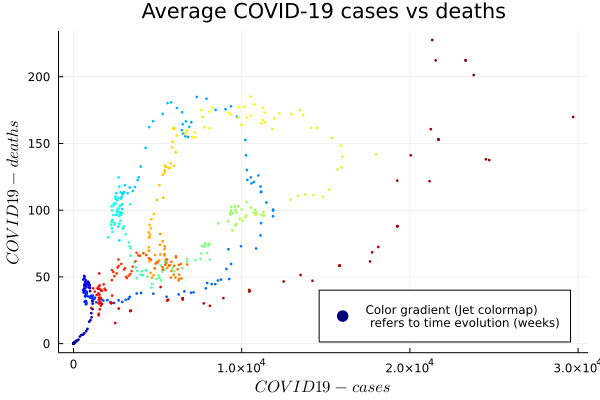

In [3]:
sctrp1 = scatter(cases_avg, deaths_avg, markerstrokewidth=0, markersize=1.5, c=Cgrad,
                label="Color gradient (Jet colormap) \n refers to time evolution (weeks)")
scatter!(sctrp1, xlabel=L"COVID19-cases", ylabel=L"COVID19-deaths",
         title="Average COVID-19 cases vs deaths", leg=:bottomright)

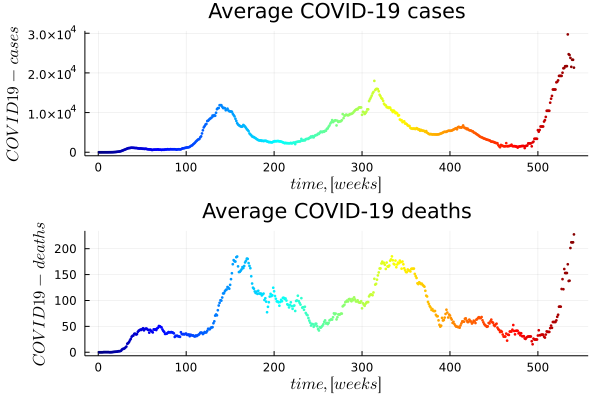

In [4]:
sctrp2 = scatter(weeks, cases_avg, markerstrokewidth=0, markersize=1.5,
                 leg=false, c=Cgrad)
scatter!(sctrp2, xlabel=L"time, [weeks]", ylabel=L"COVID19-cases",
         title="Average COVID-19 cases")

sctrp3 = scatter(weeks, deaths_avg, markerstrokewidth=0, markersize=1.5,
                 leg=false, c=Cgrad)
scatter!(sctrp3, xlabel=L"time, [weeks]", ylabel=L"COVID19-deaths",
         title="Average COVID-19 deaths")
plot(sctrp2, sctrp3, layout = (2, 1))

- Comment on the how these two features have evolved in time.

<div class="alert alert-block alert-warning">
<b>Comments: A circular pattern is shown when plotting the number of cases and deaths, suggesting that both variables rise and fall over time. Moreover, as expected, peaks in the number of COVID-19 cases and deaths overlap, indicating a correlation of both variables.</b>.
</div>

### 3.3 Third task
- One goal of every scientist should be to use data for predictions. Here, we'll use this goal as a chance to practice for loops. 

 Ideally, in a world without delays and nonlinearities, the best way to predict an outcome is with a linear model, aka a straight line. Right a "for loop" which adds 4 straight lines to our plot of average infection and average mortality. Each line should have an intercept at zero and a slope of 0.001, 0.01, 0.1 and 1. 

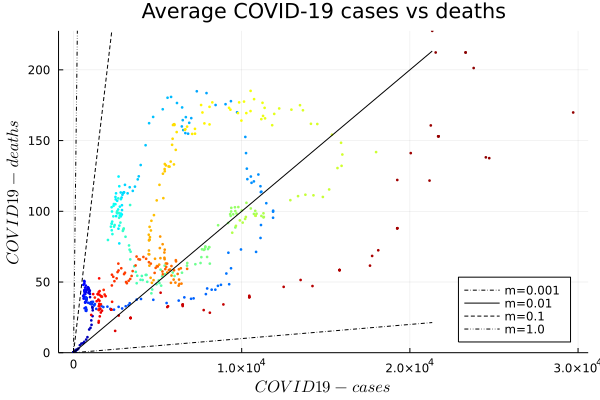

In [5]:
sctrp = scatter(cases_avg, deaths_avg, markerstrokewidth=0, markersize=1.5, c=Cgrad, label=false)
    
function line(x, m, b)
    y = m*x + b
    return y
end

w0 = cases_avg[1]
wf = cases_avg[end]
b = 0

ms = [0.001, 0.01, 0.1, 1]
lts = [:dashdot, :solid, :dash, :dashdotdot]
cls = [:black, :black, :black, :black]
for info in zip(ms, lts, cls)
    m, lt, cl = info
    y = line(wf, m, b)
    plot!(sctrp, [w0, wf], [b, y], label="m=$(m)", ls=lt, c=cl)
end

ylimits = [0.0, findmax(deaths_avg)[1]]
scatter!(sctrp, xlabel=L"COVID19-cases", ylabel=L"COVID19-deaths",
         title="Average COVID-19 cases vs deaths", leg=:bottomright, ylims=ylimits)

- Using just your eyes, which straight line seems to best fit the data? What does best fit mean? 

<div class="alert alert-block alert-warning">
<b>Comments: It is observed that most of the scatter data fit the straight line with slope $m=0.01$</b>.
</div>

# Problem 4 Github

- Create a github repository called "Che_Math".
- Create a read me file that explain that this repository will include code related to homeworks and projects from this course.
- Push this homework assignment to your repository.
- Enter the link you your repository here:
[github/SantiagoOrtiz/Che_Math](https://github.com/SantiagoOrtiz/Che_Math)

**All jupyter notebooks were uploaded to Canvas for grading. Thank you!**

***